In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
training = r"C:\Users\DELL\Documents\mlmed\practice2\training_set_pixel_size_and_HC.csv"
testing = r"C:\Users\DELL\Documents\mlmed\practice2\test_set_pixel_size.csv"
img_train = r"C:\Users\DELL\Documents\mlmed\practice2\training_set"
img_test = r"C:\Users\DELL\Documents\mlmed\practice2\test_set"

In [ ]:
def load_image(file_path, img_size=(224, 224)):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)
    img = img / 255.0  
    return img

def load_dataset(csv_path, img_folder, is_train=True):
    df = pd.read_csv(csv_path)
    data, labels = [], []
    img_size = (224, 224)
    for _, row in df.iterrows():
        file_path = os.path.join(img_folder, row['filename'])
        img = load_image(file_path, img_size)
        data.append(img)
        if is_train:
            labels.append(row['head circumference (mm)']) 
    
    data = np.array(data).reshape(-1, img_size[0], img_size[1], 1)
    labels = np.array(labels) if is_train else None
    return data, labels

In [13]:
X_train, y_train = load_dataset(training, img_train, is_train=True)
X_test, _ = load_dataset(testing, img_test, is_train=False)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16, callbacks=[es])

y_pred = model.predict(X_test)
print("Predicted head circumference values:", y_pred)


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 869ms/step - loss: 76.9477 - mae: 76.9477 - val_loss: 136.7181 - val_mae: 136.7181
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 767ms/step - loss: 34.2911 - mae: 34.2911 - val_loss: 110.0365 - val_mae: 110.0365
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 774ms/step - loss: 30.3018 - mae: 30.3018 - val_loss: 107.2466 - val_mae: 107.2466
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 767ms/step - loss: 27.9229 - mae: 27.9229 - val_loss: 117.7606 - val_mae: 117.7606
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 782ms/step - loss: 27.2888 - mae: 27.2888 - val_loss: 98.4083 - val_mae: 98.4083
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 782ms/step - loss: 25.7921 - mae: 25.7921 - val_loss: 127.2343 - val_mae: 127.2343
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - loss: 25.3790 - mae: 25.3790 - val_loss: 86.5703 - val_mae: 86.5703
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 781ms/step - loss: 23.6995 - mae: 23.6995 - val_loss: 97.8008 - val_mae: 97.8008
Epoch 

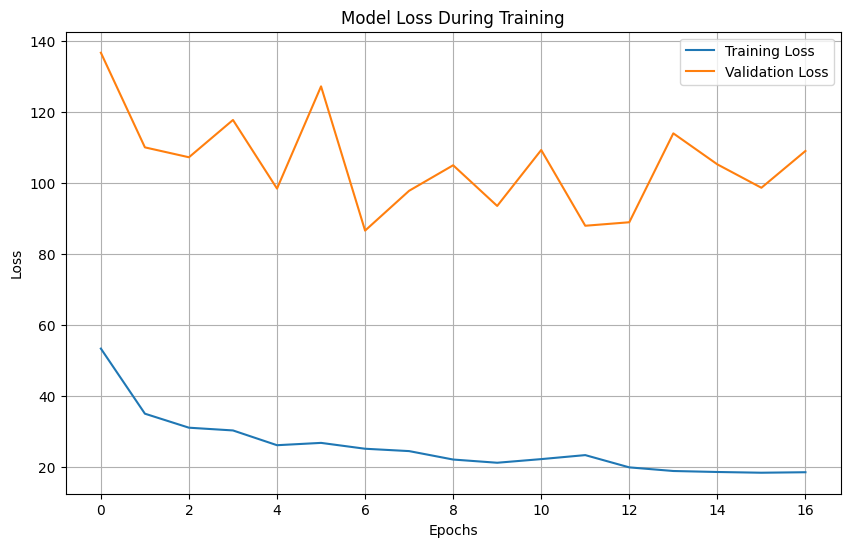

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
